In [9]:
import pandas as pd
import numpy as np
import json
import math
import matplotlib.pyplot as plt
import subprocess
%matplotlib notebook

# Motion Profile Visualization
This uses our Java robot code to output motion profile points to a `.csv` file we use to plot.

Parameters are:

- `dt` = iteration time, loop period (ms)
- `t1` = time for first filter (ms)
- `t2` = time for second filter (ms)
- `v_prog` = desired max velocity (ft/sec)
- `dist` = travel distance (ft)


In [35]:
dt     = 10
t1     = 200
t2     = 100
v_prog = 16
dist   = 8

In [36]:
motion_input = {"motion":{"dt":dt, "t1": t1, "t2": t2, "v_prog": v_prog, "dist": dist}}

In [37]:
process = subprocess.run("../build/install/motion/bin/motion '{}'".format(json.dumps(motion_input)), shell=True)

In [38]:
df = pd.read_csv("output.csv", index_col="Time")

In [39]:
print("time to end point    = {:.0f} ms".format(df.index.max()))
print("time to max velocity = {:.0f} ms".format((math.ceil(t1/dt) + math.ceil(t2/dt))*dt))
print("max velocity         = {:.1f} ft/sec".format(df['Velocity'].max()))
print("max acceleration     = {:.1f} ft/sec^2".format(df['Acceleration'].max()))

time to end point    = 800 ms
time to max velocity = 300 ms
max velocity         = 16.0 ft/sec
max acceleration     = 80.0 ft/sec^2


<IPython.core.display.Javascript object>


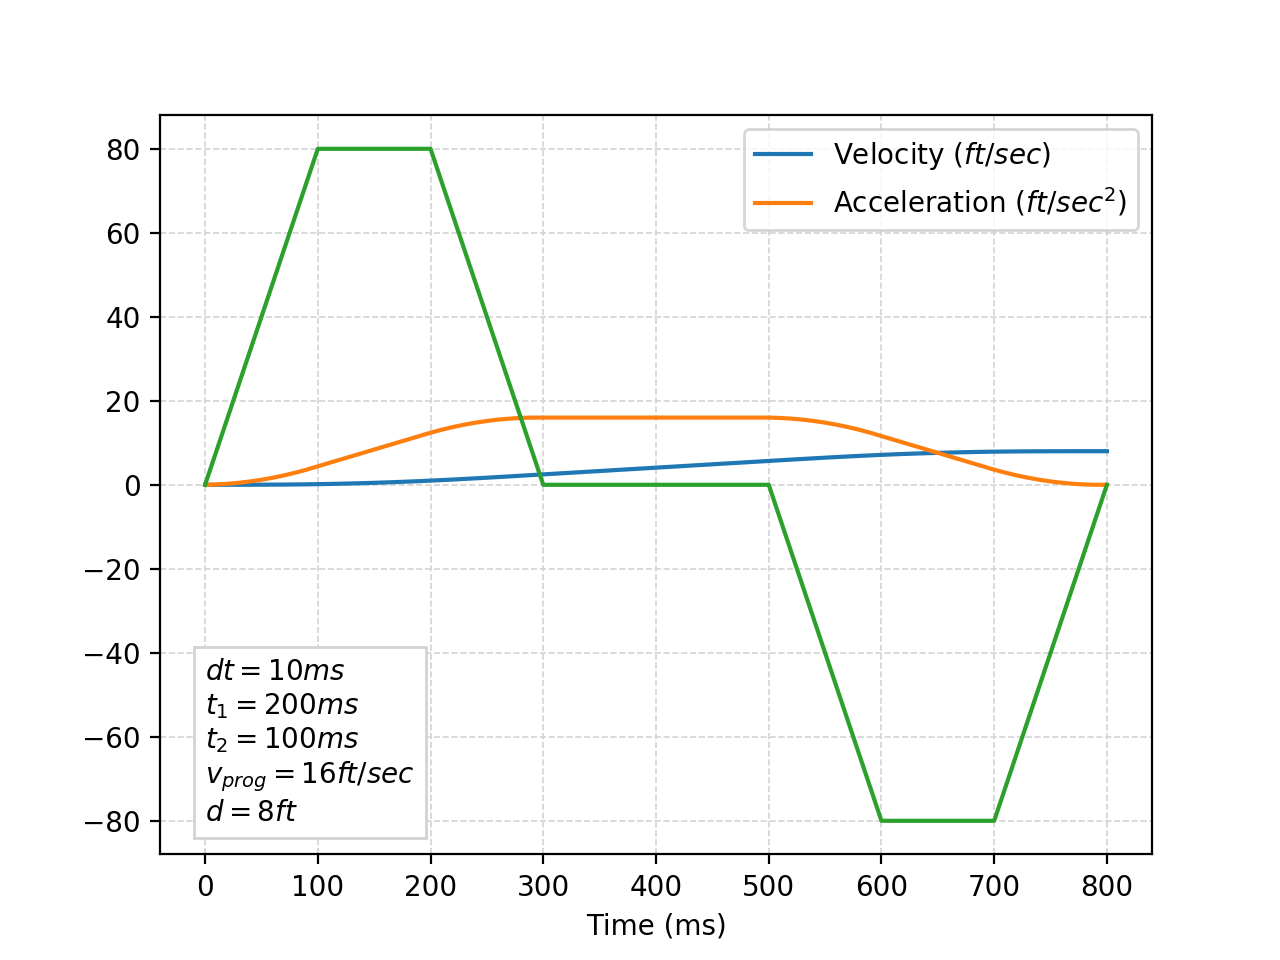

In [43]:
df.loc[:,['Position', 'Velocity', 'Acceleration']].plot()
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.6)
plt.xlabel("Time (ms)")
plt.legend(["Velocity ($ft/sec$)", "Acceleration ($ft/sec^2$)"])
text = plt.text(0,
                df['Acceleration'].min(),
        "$dt = {} ms$\n$t_1 = {} ms$\n$t_2 = {} ms$\n$v_{{prog}} = {} ft/sec$\n$d = {} ft$".format(dt, t1, t2, v_prog, dist),
       bbox=dict(facecolor='white', edgecolor='lightgray'))